You eat the apple!


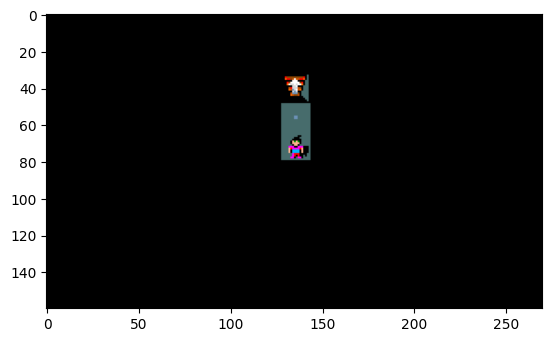

In [41]:
import gym
import time
import matplotlib.pyplot as plt
from pyswip import Prolog
#from utils import create_level, define_reward
import IPython.display as display
from minihack import LevelGenerator
from minihack import RewardManager

#Global variables 
H = 10
W = 10
NUM_EPISODES = 5
MAX_STEPS = 30
MONSTER = 'kobold'
WEAPON = 'tsurugi'
PATH = 'kb.pl'
N_MONSTER = 1

#simple level creation: we create a 1x3 room and we place the apple in the (0,2) position
lvl = LevelGenerator(w=1, h=3)
lvl.add_object(name='apple', symbol='%',place=(0,2))
des_file = lvl.get_des()

#simple reward setting: we set the reward as eating the apple
reward_manager = RewardManager()
reward_manager.add_eat_event(name='apple', reward=2, terminal_sufficient=True, terminal_required=True)


#With this command we decide to create a custom map, we also specify the type of the character and the observation keys,
#obs keys are important because they represent a unique way of seeing the enviroment, the obs keys used here are:
#----> screen_descriptions: textual descriptions of each cell present in the map. NetHack provides these textual descriptions.
#----> inv_strs: encodings of textual descriptions of objects present in the current inventory view.
#----> blstats: a representation of the status line at the bottom of the screen, containing information about the player character’s position, health, attributes 
#               and other statuses. It comes in the form of a dimension 25 vector.
#----> message: the utf-8 encoding of the on-screen message displayed at the top of the screen. It’s a 256-dim vector.
#----> pixel: a representation of the current screen in image form.
env = gym.make('MiniHack-Skill-Custom-v0',
               character="sam-hum-neu-mal",
               observation_keys=('screen_descriptions','inv_strs','blstats','message','pixel'),
               des_file=des_file,
               reward_manager=reward_manager)

#we reset the enviroment and we render it, showing it in a 'nethack' way
obs = env.reset()
env.render()

#to be able to visualize every step we made in the enviroment, we need to save the current state of the env before making a step
states = []
states.append(obs['pixel'])

#in this simple example the iterations are always the same: we go down 2 times, we pick the apple and we eat it
#--------------------------BLOCK OF SEQUENTIAL ACTIONS--------------------------
obs, reward, done, info = env.step(2)
#remember: we need to save obs after every iteration
states.append(obs['pixel'])
obs, reward, done, info = env.step(2)
states.append(obs['pixel'])

#pick the apple
obs, reward, done, info = env.step(49)
states.append(obs['pixel'])

#eat the apple
obs, reward, done, info = env.step(29)
states.append(obs['pixel'])

#we need to do this because when we make an 'eat' action, nethack will ask us what to eat, then we need to find the
#apple in our inventory and eat it, after this we completed the episode and the 'done' variable will be True
message = bytes(obs['message']).decode('utf-8').rstrip('\x00')
print(message)

# Because of the way the message in NetHack works
food_char = message.split('[')[1][0]
action_id = env.actions.index(ord(food_char))

#done will be true here, because we ate the apple
obs, reward, done, info = env.step(action_id)

#---------------------------------------------------------------------------------


#we can visualize the actual state of the env plotting it using the 'pixel' obs key
image = plt.imshow(states[0][115:275, 480:750])
for state in states[1:]:
    time.sleep(0.5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(state[110:275, 480:750])
time.sleep(0.5)
display.display(plt.gcf())
display.clear_output(wait=True)

if(done):
    print('You eat the apple!')
